In [1]:
import librosa
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import time
from librosa import display



In [2]:
file_path = '/home/sisir/BDA/ravdess/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(file_path):
  for file in files:
      try:
        # Load a librosa array, obtain mfcss,mel, chroma features store the file and all information in a new arrays
        X, sample_rate = librosa.load(os.file_path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
        stft = np.abs(librosa.stft(X))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        # The code below converts the labels starting from 1 to 8 to a series from 0 to 7
        # This is because the predictor needs to start from 0 otherwise it will try to predict 0 also.
        file = int(file[7:8]) - 1 
        mfccs_mel_features = np.hstack((mfccs,mel))
        mfccs_mel_chroma_features = np.hstack((mfccs_mel_features,chroma))
        arr = mfccs_mel_chroma_features, file
        lst.append(arr)
    
      # If the file is not valid, below code skip's it
      except ValueError:
        continue
# print(mfccs.shape)
# print(mel.shape)
# print(arr)
# print(len(arr))
print("--- Data has loaded and the Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 209.822203874588 seconds ---


In [3]:
X, y = zip(*lst)

In [4]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((1440, 180), (1440,))

In [5]:
# Decision Tree Classifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [7]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.09      0.15      0.11        27
           1       0.44      0.46      0.45        57
           2       0.24      0.23      0.23        57
           3       0.18      0.21      0.20        56
           4       0.53      0.49      0.51        55
           5       0.40      0.38      0.39        61
           6       0.28      0.24      0.26        62
           7       0.35      0.30      0.32        57

    accuracy                           0.32       432
   macro avg       0.32      0.31      0.31       432
weighted avg       0.33      0.32      0.32       432

[[ 4  4  2 14  1  0  1  1]
 [12 26  1 11  1  3  2  1]
 [ 4  3 13  4  6 12  9  6]
 [10 16  5 12  1  2  4  6]
 [ 0  0  6  3 27  7  5  7]
 [ 2  2  8  8  3 23 11  4]
 [ 7  5  6 10  8  5 15  6]
 [ 4  3 14  4  4  5  6 17]]


In [10]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [11]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [12]:
predictions = rforest.predict(X_test)

In [13]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.29      0.07      0.12        27
           1       0.48      0.84      0.62        57
           2       0.47      0.35      0.40        57
           3       0.33      0.29      0.31        56
           4       0.68      0.55      0.61        55
           5       0.46      0.31      0.37        61
           6       0.47      0.56      0.51        62
           7       0.39      0.51      0.44        57

    accuracy                           0.46       432
   macro avg       0.45      0.44      0.42       432
weighted avg       0.46      0.46      0.44       432

[[ 2 14  5  4  0  0  1  1]
 [ 0 48  0  4  0  0  4  1]
 [ 1  2 20  2  3 11  5 13]
 [ 0 19  2 16  0  6  9  4]
 [ 0  1  1  0 30  1  9 13]
 [ 1  2  6 12  7 19  5  9]
 [ 0 11  6  3  1  1 35  5]
 [ 3  2  3  7  3  3  7 29]]


In [14]:
# Convolution Neural Networks

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [15]:
x_traincnn.shape, x_testcnn.shape

((1008, 180, 1), (432, 180, 1))

In [16]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same', input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.005, rho=0.9, decay=0.01)

Using TensorFlow backend.
/home/sisir/envs/Dissertation/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sisir/envs/Dissertation/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sisir/envs/Dissertation/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sisir/envs/Dissertation/lib/p

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 180, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 180, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           82048     
_________________________________________________________________
activation_2 (Activation)    (None, 22, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 128)          

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((1008, 180, 1), (1008,), (432, 180, 1), (432,))

In [20]:
cnn_model=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))


Train on 1008 samples, validate on 432 samples
Epoch 1/1000
1008/1008 [==============================] - 4s 4ms/step - loss: 10.1311 - accuracy: 0.1954 - val_loss: 1.9289 - val_accuracy: 0.2269
Epoch 2/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 1.7820 - accuracy: 0.2986 - val_loss: 1.8567 - val_accuracy: 0.3241
Epoch 3/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6872 - accuracy: 0.3532 - val_loss: 1.7886 - val_accuracy: 0.3565
Epoch 4/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6177 - accuracy: 0.4018 - val_loss: 1.7426 - val_accuracy: 0.3611
Epoch 5/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 1.5925 - accuracy: 0.3879 - val_loss: 1.7214 - val_accuracy: 0.3843
Epoch 6/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 1.5527 - accuracy: 0.4167 - val_loss: 1.7205 - val_accuracy: 0.3796
Epoch 7/1000
1008/1008 [==============================] - 2s 2ms/step - los

Epoch 55/1000
1008/1008 [==============================] - 3s 3ms/step - loss: 0.9515 - accuracy: 0.6696 - val_loss: 1.6660 - val_accuracy: 0.5023
Epoch 56/1000
1008/1008 [==============================] - 4s 4ms/step - loss: 0.9252 - accuracy: 0.6865 - val_loss: 1.6652 - val_accuracy: 0.5185
Epoch 57/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.9207 - accuracy: 0.6796 - val_loss: 1.6637 - val_accuracy: 0.5139
Epoch 58/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.9253 - accuracy: 0.6825 - val_loss: 1.6668 - val_accuracy: 0.5185
Epoch 59/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.9223 - accuracy: 0.6885 - val_loss: 1.6617 - val_accuracy: 0.5116
Epoch 60/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.9032 - accuracy: 0.6855 - val_loss: 1.6540 - val_accuracy: 0.5255
Epoch 61/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.9153 - accuracy: 0.6736 - val_loss: 1

1008/1008 [==============================] - 2s 2ms/step - loss: 0.7045 - accuracy: 0.7639 - val_loss: 1.6574 - val_accuracy: 0.5417
Epoch 166/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7124 - accuracy: 0.7500 - val_loss: 1.6603 - val_accuracy: 0.5532
Epoch 167/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7039 - accuracy: 0.7589 - val_loss: 1.6617 - val_accuracy: 0.5509
Epoch 168/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6896 - accuracy: 0.7659 - val_loss: 1.6693 - val_accuracy: 0.5532
Epoch 169/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6824 - accuracy: 0.7629 - val_loss: 1.6633 - val_accuracy: 0.5417
Epoch 170/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6885 - accuracy: 0.7639 - val_loss: 1.6618 - val_accuracy: 0.5440
Epoch 171/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.7530 - val_loss: 1.6631 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.6260 - accuracy: 0.7887 - val_loss: 1.6750 - val_accuracy: 0.5509
Epoch 276/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6488 - accuracy: 0.7937 - val_loss: 1.6794 - val_accuracy: 0.5486
Epoch 277/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6209 - accuracy: 0.7956 - val_loss: 1.6769 - val_accuracy: 0.5486
Epoch 278/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6254 - accuracy: 0.7917 - val_loss: 1.6707 - val_accuracy: 0.5463
Epoch 279/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6130 - accuracy: 0.8145 - val_loss: 1.6828 - val_accuracy: 0.5440
Epoch 280/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6200 - accuracy: 0.7897 - val_loss: 1.6762 - val_accuracy: 0.5509
Epoch 281/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.6289 - accuracy: 0.7798 - val_loss: 1.6761 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.5733 - accuracy: 0.7956 - val_loss: 1.6934 - val_accuracy: 0.5694
Epoch 386/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.8254 - val_loss: 1.6967 - val_accuracy: 0.5625
Epoch 387/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5763 - accuracy: 0.7927 - val_loss: 1.7009 - val_accuracy: 0.5718
Epoch 388/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5662 - accuracy: 0.8056 - val_loss: 1.6949 - val_accuracy: 0.5648
Epoch 389/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5748 - accuracy: 0.8026 - val_loss: 1.6936 - val_accuracy: 0.5602
Epoch 390/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.8016 - val_loss: 1.6952 - val_accuracy: 0.5579
Epoch 391/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.8165 - val_loss: 1.6949 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.8105 - val_loss: 1.7062 - val_accuracy: 0.5602
Epoch 496/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.8175 - val_loss: 1.7080 - val_accuracy: 0.5625
Epoch 497/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5591 - accuracy: 0.8065 - val_loss: 1.7096 - val_accuracy: 0.5648
Epoch 498/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5320 - accuracy: 0.8234 - val_loss: 1.7084 - val_accuracy: 0.5648
Epoch 499/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5353 - accuracy: 0.8095 - val_loss: 1.7043 - val_accuracy: 0.5648
Epoch 500/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.8085 - val_loss: 1.7006 - val_accuracy: 0.5625
Epoch 501/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.8145 - val_loss: 1.7009 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.5068 - accuracy: 0.8264 - val_loss: 1.7192 - val_accuracy: 0.5602
Epoch 606/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5002 - accuracy: 0.8254 - val_loss: 1.7222 - val_accuracy: 0.5579
Epoch 607/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4984 - accuracy: 0.8323 - val_loss: 1.7224 - val_accuracy: 0.5602
Epoch 608/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.8194 - val_loss: 1.7203 - val_accuracy: 0.5579
Epoch 609/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4998 - accuracy: 0.8234 - val_loss: 1.7211 - val_accuracy: 0.5579
Epoch 610/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5295 - accuracy: 0.8155 - val_loss: 1.7194 - val_accuracy: 0.5602
Epoch 611/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4852 - accuracy: 0.8373 - val_loss: 1.7229 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.4914 - accuracy: 0.8363 - val_loss: 1.7351 - val_accuracy: 0.5556
Epoch 716/1000
1008/1008 [==============================] - 3s 2ms/step - loss: 0.4870 - accuracy: 0.8313 - val_loss: 1.7373 - val_accuracy: 0.5532
Epoch 717/1000
1008/1008 [==============================] - 3s 3ms/step - loss: 0.4877 - accuracy: 0.8313 - val_loss: 1.7342 - val_accuracy: 0.5509
Epoch 718/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4854 - accuracy: 0.8304 - val_loss: 1.7333 - val_accuracy: 0.5556
Epoch 719/1000
1008/1008 [==============================] - 4s 4ms/step - loss: 0.5119 - accuracy: 0.8274 - val_loss: 1.7296 - val_accuracy: 0.5532
Epoch 720/1000
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5292 - accuracy: 0.8254 - val_loss: 1.7306 - val_accuracy: 0.5579
Epoch 721/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5087 - accuracy: 0.8244 - val_loss: 1.7352 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.4898 - accuracy: 0.8373 - val_loss: 1.7401 - val_accuracy: 0.5532
Epoch 826/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4943 - accuracy: 0.8403 - val_loss: 1.7390 - val_accuracy: 0.5509
Epoch 827/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4503 - accuracy: 0.8522 - val_loss: 1.7422 - val_accuracy: 0.5486
Epoch 828/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.8363 - val_loss: 1.7423 - val_accuracy: 0.5532
Epoch 829/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4849 - accuracy: 0.8304 - val_loss: 1.7418 - val_accuracy: 0.5556
Epoch 830/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4699 - accuracy: 0.8343 - val_loss: 1.7448 - val_accuracy: 0.5579
Epoch 831/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4805 - accuracy: 0.8313 - val_loss: 1.7428 - 

1008/1008 [==============================] - 2s 2ms/step - loss: 0.4646 - accuracy: 0.8482 - val_loss: 1.7500 - val_accuracy: 0.5486
Epoch 936/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4536 - accuracy: 0.8492 - val_loss: 1.7494 - val_accuracy: 0.5532
Epoch 937/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.8492 - val_loss: 1.7492 - val_accuracy: 0.5486
Epoch 938/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4513 - accuracy: 0.8542 - val_loss: 1.7508 - val_accuracy: 0.5509
Epoch 939/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4734 - accuracy: 0.8363 - val_loss: 1.7523 - val_accuracy: 0.5509
Epoch 940/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4533 - accuracy: 0.8581 - val_loss: 1.7519 - val_accuracy: 0.5556
Epoch 941/1000
1008/1008 [==============================] - 2s 2ms/step - loss: 0.4548 - accuracy: 0.8442 - val_loss: 1.7510 - 

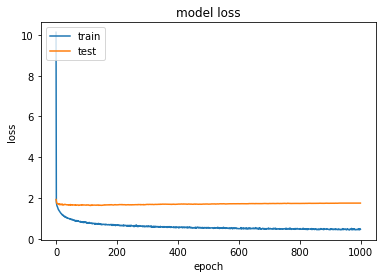

In [21]:
# Plotting the model loss

plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

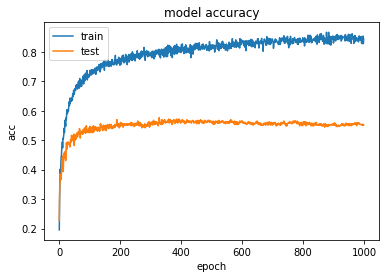

In [22]:
# Plotting model accuracy

plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
predictions = model.predict_classes(x_testcnn)

In [24]:
predictions

array([3, 7, 7, 6, 2, 7, 4, 7, 0, 5, 7, 5, 6, 1, 7, 1, 5, 7, 4, 4, 5, 5,
       3, 7, 4, 2, 7, 1, 6, 1, 6, 3, 6, 2, 1, 0, 4, 1, 7, 5, 1, 4, 1, 6,
       7, 4, 7, 0, 4, 7, 3, 5, 4, 2, 6, 7, 7, 3, 3, 5, 2, 3, 1, 6, 2, 2,
       3, 2, 5, 7, 5, 3, 4, 3, 2, 7, 7, 6, 2, 4, 7, 5, 2, 3, 7, 1, 7, 0,
       1, 6, 7, 6, 7, 1, 3, 2, 3, 4, 7, 6, 2, 5, 3, 2, 0, 5, 0, 5, 0, 0,
       6, 5, 0, 7, 1, 7, 2, 5, 1, 1, 2, 1, 5, 5, 7, 4, 6, 7, 3, 7, 1, 7,
       2, 4, 6, 7, 7, 7, 1, 1, 7, 2, 6, 1, 7, 6, 1, 6, 7, 4, 6, 6, 1, 1,
       1, 6, 4, 1, 4, 0, 5, 7, 5, 4, 6, 1, 5, 3, 3, 5, 5, 5, 5, 0, 7, 3,
       3, 2, 6, 1, 6, 1, 7, 5, 4, 7, 1, 6, 5, 7, 7, 5, 5, 6, 2, 1, 6, 1,
       6, 0, 1, 2, 7, 1, 6, 6, 6, 3, 3, 5, 6, 2, 3, 5, 1, 7, 6, 3, 4, 1,
       4, 0, 2, 1, 1, 4, 1, 6, 0, 1, 2, 1, 6, 3, 2, 2, 1, 5, 1, 6, 4, 7,
       2, 6, 6, 4, 7, 6, 6, 6, 2, 6, 6, 5, 1, 5, 6, 6, 5, 3, 5, 7, 1, 1,
       6, 1, 3, 1, 3, 0, 1, 4, 2, 4, 6, 5, 7, 4, 3, 2, 2, 5, 1, 4, 0, 5,
       7, 6, 1, 5, 5, 7, 7, 6, 3, 7, 2, 1, 2, 5, 1,

In [25]:
y_test

array([1, 7, 6, 7, 7, 2, 4, 7, 0, 5, 2, 5, 4, 1, 7, 1, 5, 7, 4, 7, 5, 4,
       6, 5, 3, 2, 7, 1, 0, 1, 2, 0, 6, 2, 1, 1, 4, 7, 3, 5, 1, 4, 1, 6,
       2, 5, 7, 1, 4, 7, 2, 3, 4, 2, 6, 7, 7, 2, 3, 5, 5, 0, 1, 2, 2, 6,
       0, 2, 5, 0, 5, 3, 3, 5, 6, 5, 2, 6, 2, 4, 7, 4, 2, 4, 7, 3, 7, 5,
       6, 6, 6, 5, 7, 1, 1, 2, 3, 2, 7, 3, 2, 4, 5, 5, 7, 5, 5, 5, 6, 7,
       6, 6, 0, 6, 0, 6, 5, 5, 1, 1, 7, 3, 5, 5, 7, 4, 4, 7, 3, 7, 1, 7,
       5, 4, 6, 7, 5, 3, 3, 2, 7, 6, 4, 1, 7, 4, 1, 6, 4, 4, 6, 0, 6, 1,
       0, 6, 4, 1, 4, 3, 5, 6, 3, 0, 6, 3, 2, 3, 3, 6, 3, 5, 5, 6, 5, 7,
       3, 2, 5, 1, 6, 6, 7, 2, 3, 7, 1, 4, 3, 7, 7, 5, 3, 6, 6, 1, 6, 1,
       6, 0, 0, 2, 7, 3, 6, 6, 3, 0, 4, 5, 6, 6, 1, 5, 1, 7, 1, 3, 4, 6,
       4, 1, 4, 1, 1, 4, 1, 6, 3, 1, 2, 6, 6, 3, 2, 2, 3, 5, 3, 3, 4, 7,
       1, 6, 6, 4, 2, 1, 3, 2, 3, 6, 6, 5, 1, 4, 7, 4, 5, 3, 5, 4, 1, 3,
       6, 1, 2, 1, 3, 1, 1, 4, 2, 5, 6, 2, 7, 4, 7, 2, 2, 2, 0, 7, 0, 4,
       7, 5, 1, 2, 7, 3, 5, 6, 1, 7, 2, 6, 2, 2, 1,

In [26]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.24      0.22      0.23        27
           1       0.59      0.74      0.66        57
           2       0.55      0.49      0.52        57
           3       0.43      0.36      0.39        56
           4       0.67      0.64      0.65        55
           5       0.58      0.57      0.58        61
           6       0.57      0.53      0.55        62
           7       0.57      0.68      0.62        57

    accuracy                           0.55       432
   macro avg       0.53      0.53      0.52       432
weighted avg       0.55      0.55      0.55       432

[[ 6  7  2  7  1  0  2  2]
 [ 6 42  1  6  0  0  2  0]
 [ 0  2 28  3  5  9  3  7]
 [ 5 12  1 20  3  8  4  3]
 [ 0  0  1  2 35  5  7  5]
 [ 2  0  9  3  2 35  4  6]
 [ 2  7  6  3  2  2 33  7]
 [ 4  1  3  2  4  1  3 39]]


In [27]:
# Multi-Layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(alpha=0.01, hidden_layer_sizes=(800,), learning_rate='adaptive', batch_size=256)


In [28]:
#train the MLP model

mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(800,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [29]:
mlpc_predictions = mlpc.predict(X_test)

In [30]:
print(classification_report(y_test,mlpc_predictions))
print(confusion_matrix(y_test,mlpc_predictions))

              precision    recall  f1-score   support

           0       0.23      0.78      0.35        27
           1       0.89      0.14      0.24        57
           2       0.42      0.68      0.52        57
           3       0.62      0.27      0.38        56
           4       0.90      0.49      0.64        55
           5       0.60      0.64      0.62        61
           6       0.51      0.61      0.55        62
           7       0.66      0.51      0.57        57

    accuracy                           0.50       432
   macro avg       0.60      0.52      0.48       432
weighted avg       0.63      0.50      0.49       432

[[21  0  3  1  0  0  0  2]
 [31  8  5  2  0  2  9  0]
 [ 3  0 39  1  1 10  2  1]
 [20  0  5 15  0 10  5  1]
 [ 4  0 10  0 27  2  8  4]
 [ 3  0  9  2  1 39  5  2]
 [ 4  1 10  3  1  0 38  5]
 [ 6  0 12  0  0  2  8 29]]
